In [1]:
%matplotlib inline

In [2]:
from empirical_disk_bulge.load_sdss_data import load_umachine_sdss_complete

sdss = load_umachine_sdss_complete()
mask = sdss['type_mendel13'] != 4
mask *= sdss['deltaBD_mendel13'] <= 1
cut_sdss = sdss[mask]

In [3]:
from scipy.stats import gaussian_kde

dataset = np.array((sdss['sm'], sdss['ssfr'], sdss['bt']))
cut_dataset = np.array((cut_sdss['sm'], cut_sdss['ssfr'], cut_sdss['bt']))

kdeobj = gaussian_kde(dataset)
kdeobj_cut = gaussian_kde(cut_dataset)

npts_bt = 20
bt_abscissa = np.linspace(0, 1, npts_bt)
np.save('bt_abscissa', bt_abscissa)

output_fname = 'bt_pdf_sm{0:.2f}_ssfr{1:.2f}'

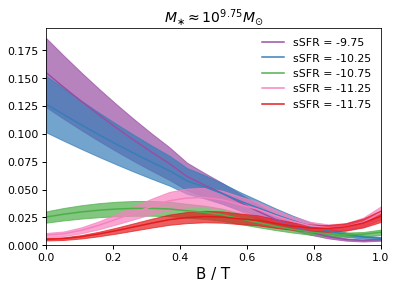

In [4]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

sm_fixed = 9.75
ssfr_abscissa = [-9.75, -10.25, -10.75, -11.25, -11.75]
color_sequence = [purple, blue, green, pink, red]

error_size = 0.20
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    np.save(output_fname.format(sm_fixed, ssfr), bt_pdf)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{9.75}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)
ylim = ax.set_ylim(ymin=0)

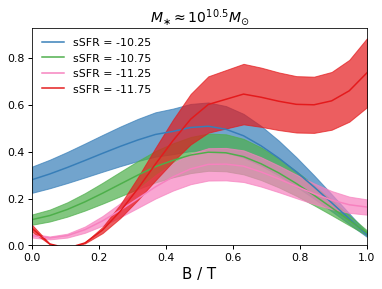

In [5]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

sm_fixed = 10.5
ssfr_abscissa = [-10.25, -10.75, -11.25, -11.75]
color_sequence = [blue, green, pink, red]

error_size = 0.20
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    np.save(output_fname.format(sm_fixed, ssfr), bt_pdf)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{10.5}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)
ylim = ax.set_ylim(ymin=0)

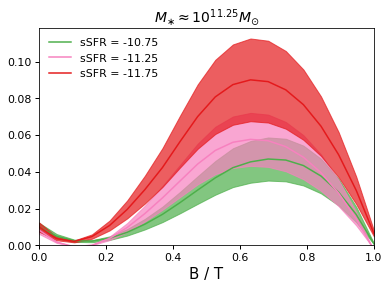

In [6]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

sm_fixed = 11.25
ssfr_abscissa = [-10.75, -11.25, -11.75]
color_sequence = [green, pink, red]

error_size = 0.25
for ssfr, color in zip(ssfr_abscissa, color_sequence):
    label = 'sSFR = {0:.2f}'.format(ssfr)
    bt_pdf = list(kdeobj_cut.evaluate((sm_fixed, ssfr, bt))[0] for bt in bt_abscissa)
    np.save(output_fname.format(sm_fixed, ssfr), bt_pdf)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
title = ax.set_title(r'$M_{\ast} \approx 10^{11.25}M_{\odot}$', size=14)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)
ylim = ax.set_ylim(ymin=0)

# Now for PDFs that have not been sSFR-conditioned

In [7]:
from scipy.stats import gaussian_kde

cut_dataset = np.array((cut_sdss['sm'], cut_sdss['bt']))
kdeobj_cut = gaussian_kde(cut_dataset)

output_fname = 'bt_pdf_sm{0:.2f}'

npts_bt = 20
bt_abscissa = np.linspace(0, 1, npts_bt)

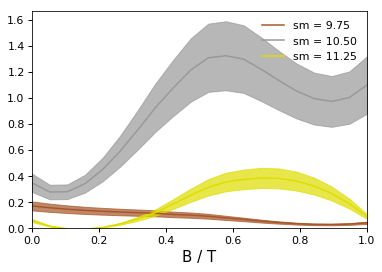

In [11]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

sm_abscissa = [9.75, 10.5, 11.25]
color_sequence = [brown, gray, yellow]

error_size = 0.20
for sm, color in zip(sm_abscissa, color_sequence):
    label = 'sm = {0:.2f}'.format(sm)
    bt_pdf = list(kdeobj_cut.evaluate((sm, bt))[0] for bt in bt_abscissa)
    np.save(output_fname.format(sm), bt_pdf)
    bt_pdf_smooth = savgol_filter(bt_pdf, 15, 3)
    bt_pdf_low, bt_pdf_high = (1-error_size)*bt_pdf_smooth, (1+error_size)*bt_pdf_smooth

    __=ax.plot(bt_abscissa, bt_pdf_smooth, color=color, label=label)
    __=ax.fill_between(bt_abscissa, bt_pdf_low, bt_pdf_high, alpha=0.7, color=color)

legend = ax.legend(fontsize=11)
xlabel = ax.set_xlabel(r'B / T', size=15)
xlim = ax.set_xlim(0, 1)
ylim = ax.set_ylim(ymin=0)

In [9]:
kdeobj_cut.evaluate?

In [10]:
gaussian_kde?